## Numba randomness eksempel

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from numba import njit

In [2]:
def set_price(i, t, p_table, prices, epsilon, draws):
    
    if epsilon >= np.random.uniform(0,1):
        # pull price from predefined list of randomized choices
        return draws[t]
    else:
        if i == 0:
            j = 1
        if i == 1:
            j = 0
        return max(prices)

In [3]:
def simulation(prices, draws, T):

    i = 0
    j = 1
    t = 0
    
    # table of prices
    p_table = np.empty((3, T))
    p_table.fill(np.nan)
    
    theta = -(1/1000000)**(1/T) + 1 # calculate the decay parameter theta
    epsilon = (1 - theta)**t # epsilon starts at 1, then decays over time
    
    while t < T:
        if i == 0:
            p_table[i, t] = set_price(i, t, p_table, prices, epsilon, draws)
        if i ==1:
            p_table[i, t] = set_price(i, t, p_table, prices, epsilon, draws)
            
        epsilon = (1 - theta)**t  # compute new epsilon using decay parameter
        
        # Update variables
        tmp = i
        i = j
        j = tmp
        t += 1
    return p_table

In [4]:
def main():
    T = 5000
    N = 1
    
    prices = np.linspace(0, 1, 7)
    for n in range(N):
        uniform_prices_draws = [np.random.choice(prices) for i in range(T)]
        p_table = simulation(prices, uniform_prices_draws, T)
    fig, axs = plt.subplots(2)
    axs[0].hist(p_table[0,:], bins=[i/10 for i in range(0,11)])
    axs[1].hist(p_table[1,:], bins=[i/10 for i in range(0,11)])
    plt.show()

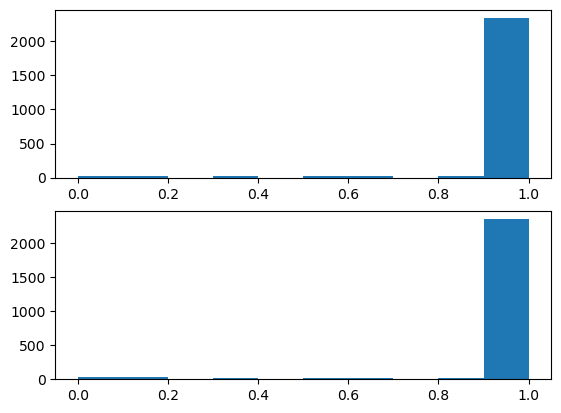

In [5]:
main()

In [6]:
@njit
def set_price_njit(i, t, p_table, prices, epsilon, draws):
    
    if epsilon >= np.random.uniform(0,1):
        # pull price from predefined list of randomized choices
        return draws[t]
    else:
        if i == 0:
            j = 1
        if i == 1:
            j = 0
        return max(prices)

In [7]:
@njit
def simulation_njit(prices, draws, T):

    i = 0
    j = 1
    t = 0
    
    # table of prices
    p_table = np.empty((3, T))
    p_table.fill(np.nan)
    
    theta = -(1/1000000)**(1/T) + 1 # calculate the decay parameter theta
    epsilon = (1 - theta)**t # epsilon starts at 1, then decays over time
    
    while t < T:
        if i == 0:
            p_table[i, t] = set_price_njit(i, t, p_table, prices, epsilon, draws)
        if i ==1:
            p_table[i, t] = set_price_njit(i, t, p_table, prices, epsilon, draws)
            
        epsilon = (1 - theta)**t  # compute new epsilon using decay parameter
        
        # Update variables
        tmp = i
        i = j
        j = tmp
        t += 1
    return p_table

In [8]:
@njit
def main_njit():
    T = 5000
    N = 1
    
    prices = np.linspace(0, 1, 7)
    for n in range(N):
        uniform_prices_draws = [np.random.choice(prices) for i in range(T)]
        p_table = simulation_njit(prices, uniform_prices_draws, T)
    return p_table

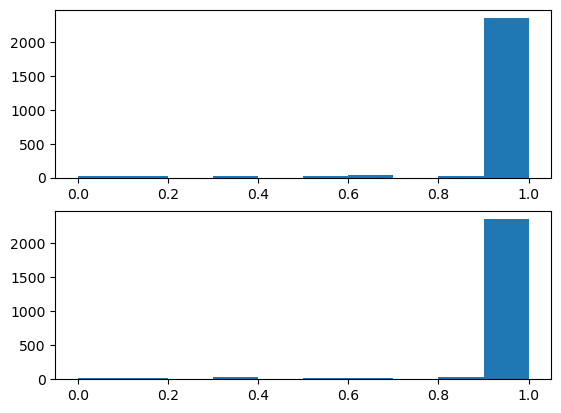

In [9]:
p_table = main_njit()
fig, axs = plt.subplots(2)
axs[0].hist(p_table[0,:], bins=[i/10 for i in range(0,11)])
axs[1].hist(p_table[1,:], bins=[i/10 for i in range(0,11)])
plt.show()